In [29]:
import pandas as pd
d = pd.read_csv('data.csv')


In [63]:


def filter_high_expression(df, threshold):
    """Filter genes with mean expression above threshold."""
    df['Mean'] = df[['Sample1', 'Sample2', 'Sample3']].mean(axis=1)
    return df[df['Mean'] > threshold][['Gene','Mean']]

# Example usage:
df = pd.read_csv("data.csv")
high_expr = filter_high_expression(df, 7)
high_expr.head()

,Gene,Mean
0,Gene1,7.166667
10,Gene11,7.266667
18,Gene19,7.066667
28,Gene29,7.200000
36,Gene37,7.100000


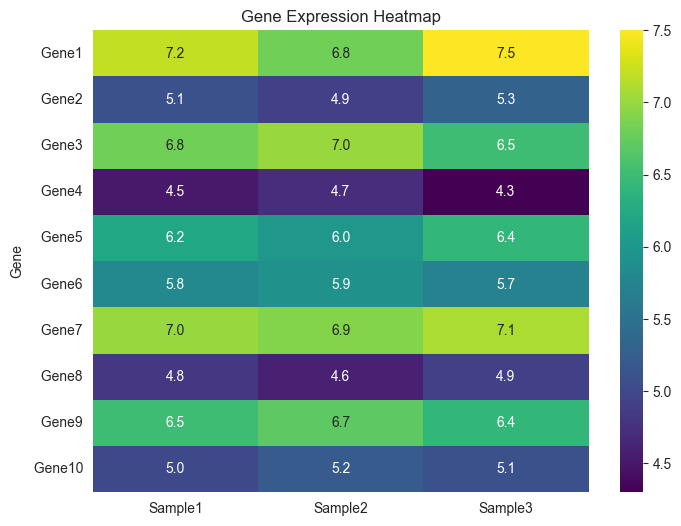

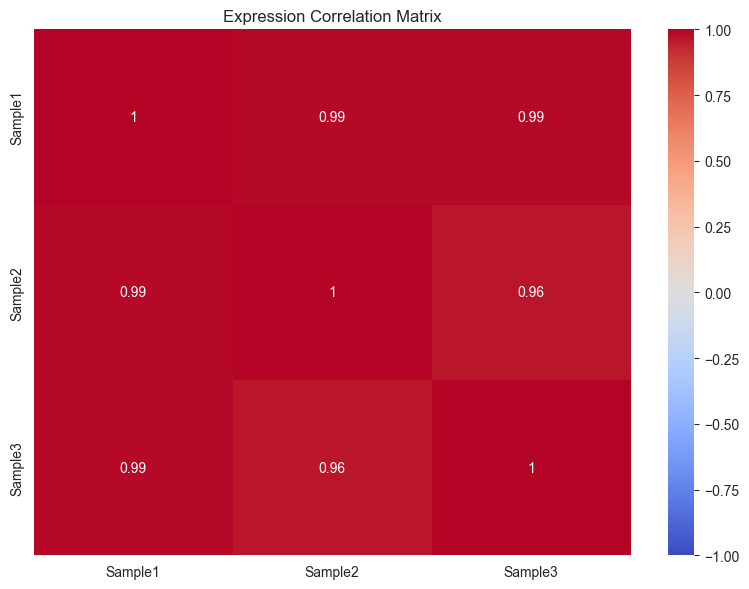

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def plot_heatmap(df, output_file):

    # Plot a heatmap of gene expression for the first 10 genes.
    
    sns.set_style("whitegrid")
    plt.figure(figsize=(8, 6))
    subset = df.head(10).set_index("Gene")[['Sample1', 'Sample2', 'Sample3']]
    sns.heatmap(subset, cmap="viridis", annot=True, fmt=".1f")
    plt.title("Gene Expression Heatmap")
    plt.show()
    plt.savefig(output_file, dpi=300)
    plt.close()

def plot_correlation(df, output_file):

    # Plot correlation matrix of expression levels.

    sns.set_style("whitegrid")
    plt.figure(figsize=(8, 6))
    corr = df[['Sample1', 'Sample2', 'Sample3']].corr()
    sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
    plt.title("Expression Correlation Matrix")
    plt.show()
    plt.savefig(output_file, dpi=300)
    plt.close()

# Usage
df = pd.read_csv("data.csv")
plot_heatmap(df, "heatmap.png")
plot_correlation(df, "correlation.png")

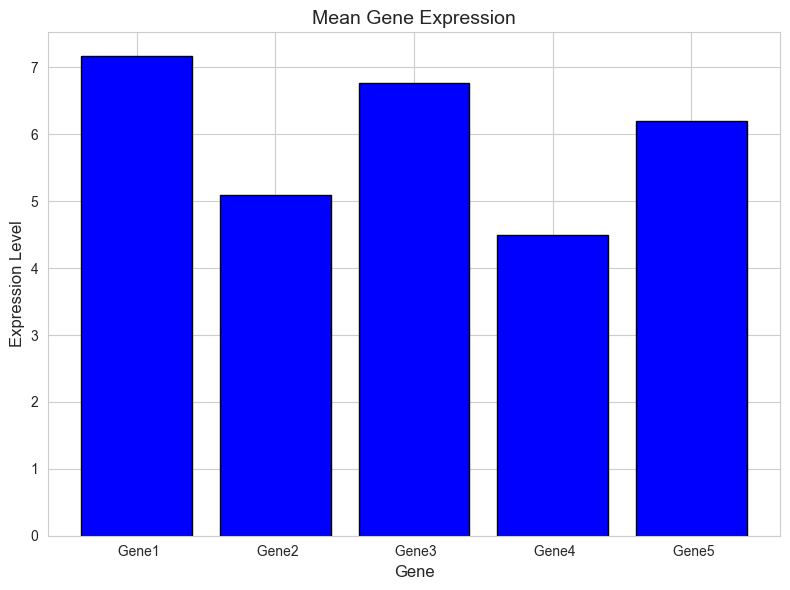

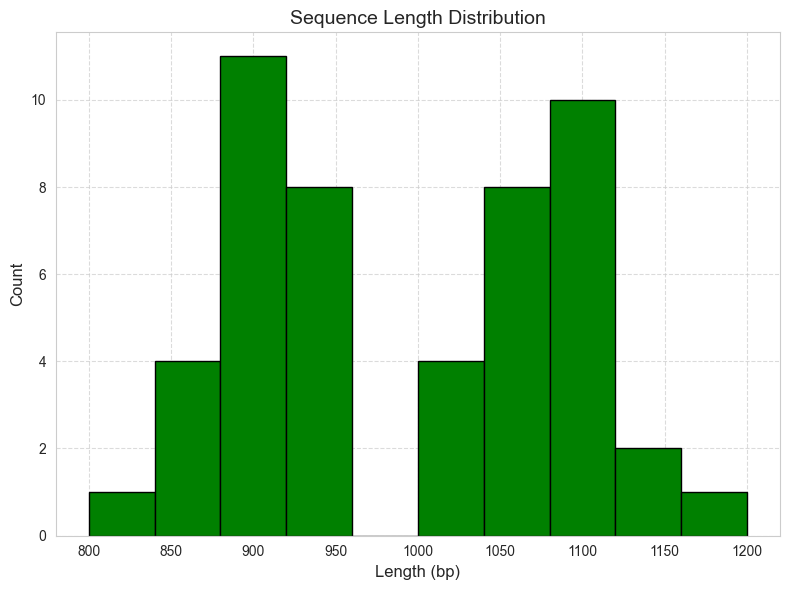

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_bar_chart(df, output_file):
    # Plot bar chart of mean expression for first 5 genes.
    plt.figure(figsize=(8, 6))
    subset = df.head(5)
    means = subset[['Sample1', 'Sample2', 'Sample3']].mean(axis=1)
    plt.bar(subset['Gene'], means, color='blue', edgecolor='black')
    plt.title("Mean Gene Expression", fontsize=14)
    plt.xlabel("Gene", fontsize=12)
    plt.ylabel("Expression Level", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    plt.close()

def plot_length_freq(df, output_file):
    # Plot frequency distribution of sequence lengths.
    plt.figure(figsize=(8, 6))
    plt.hist(df['Length'], color='green', edgecolor='black')
    plt.title("Sequence Length Distribution", fontsize=14)
    plt.xlabel("Length (bp)", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    plt.close()

# Usage
df = pd.read_csv("data.csv")
plot_bar_chart(df, "bar_chart.png")
plot_length_freq(df, "length_freq.png")

In [1]:
import plotly.express as px
import pandas as pd

def plot_scatter(df, output_file):
    # Plot interactive scatter of expression vs. length
    df['Mean'] = df[['Sample1', 'Sample2', 'Sample3']].mean(axis=1)
    fig = px.scatter(df, x="Mean", y="Length", text="Gene", title="Expression vs. Sequence Length")
    fig.update_layout(font=dict(size=12), title_font_size=14)
    fig.show()
    # fig.write_html(output_file)

def plot_trends(df, output_file):
    # Plot interactive line plot of expression trends for first 5 genes.
    subset = df.head(5)
    fig = px.line(subset, x=['Sample1', 'Sample2', 'Sample3'], y=subset['Gene'].values, title="Gene Expression Trends")
    fig.update_layout(xaxis_title="Sample", yaxis_title="Expression", font=dict(size=12), title_font_size=14)
    fig.show()
    # fig.write_html(output_file)

# Usage
df = pd.read_csv("data.csv")
plot_scatter(df, "scatter.html")
plot_trends(df, "trends.html")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed